In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

Matplotlib is building the font cache; this may take a moment.


In [10]:
df = pd.read_csv("/Users/jacobfrancis/dev/csc180/csv/canada_per_capita_income.csv")
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [13]:
model = linear_model.LinearRegression()
model.fit(df[['year']], df.income)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


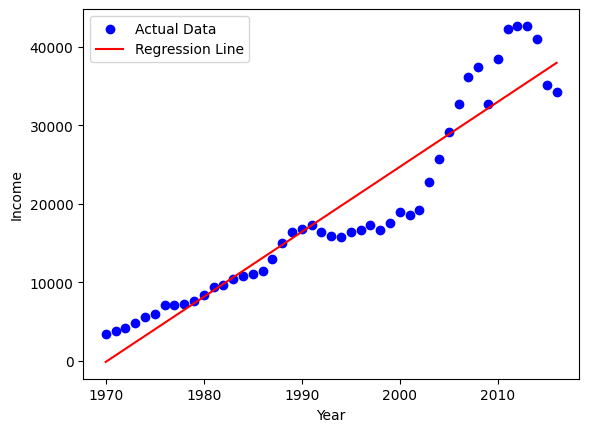

In [14]:
plt.scatter(df.year, df.income, color="blue", label="Actual Data")
plt.plot(df.year, model.predict(df[['year']]), color="red", label="Regression Line")
plt.xlabel("Year")
plt.ylabel("Income")
plt.legend()
plt.show()


In [15]:
print("Prediction for 2030:", model.predict([[2030]])[0])
print("Prediction for 1965:", model.predict([[1965]])[0])


Prediction for 2030: 49573.34484664467
Prediction for 1965: -4276.8850428315345


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
